# Defining Sensor Coverage
The brain is a network of regions.
Different subsets of regions map onto different functionally distinct outputs, or *behaviors*.

When we measure brain regions we measure an independent (potentially overlapping, potentially identical, potentially different, etc.) set of brain regions compared to those associated with our functional input(s) of interest.

Let's formally define the *sensor coverage* metric.

In [89]:
from dbread.ro_sys import RO_SYS
import jax.numpy as np
import numpy as nnp
import matplotlib.pyplot as plt

B = 1
M = 1
regions = 10

basic_system = RO_SYS(B = B, M = M, regions = regions)
basic_system.H = nnp.zeros((basic_system.regions, basic_system.B))
basic_system.H[0:,:] = 1
basic_system.gamma = nnp.zeros((basic_system.regions, basic_system.M))
basic_system.gamma[0:5,:] = 0.3
basic_system.coverage()

DeviceArray([[0.8]], dtype=float32)

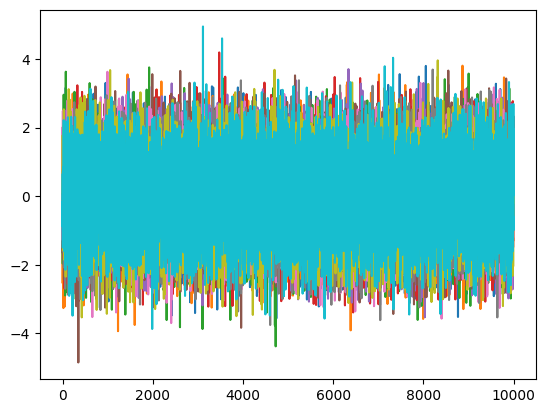

In [77]:
# we need a signal for the underlying regions
T = 10000
X_regions = nnp.random.multivariate_normal(0*np.zeros(regions),nnp.eye(regions), size=(T,))

plt.plot(X_regions)
plt.show()

PearsonRResult(statistic=0.33711336205653486, pvalue=2.9088382532694844e-264)
[0.28345426]


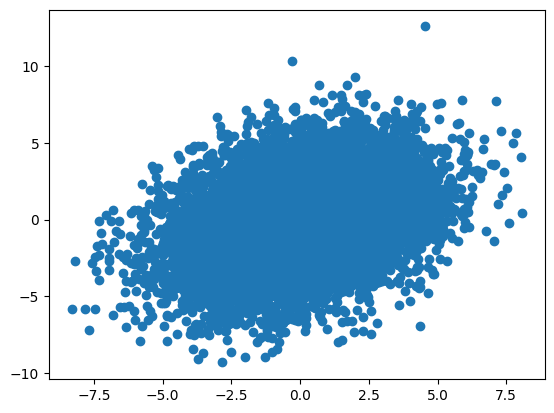

In [60]:
from scipy.stats import pearsonr
import statsmodels.api as sm

predicted = nnp.dot(basic_system.H.T, X_regions.T).squeeze()
actual = nnp.dot(basic_system.gamma.T, X_regions.T).squeeze()
plt.scatter(predicted,actual)
print(pearsonr(predicted, actual))


model = sm.OLS(predicted,actual)
corr = model.fit()
print(corr.params)


PearsonRResult(statistic=0.33711336205653486, pvalue=2.9088382532694844e-264)
[0.40083944]


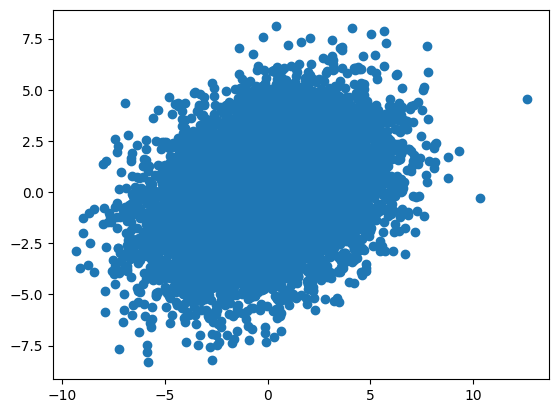

In [61]:
plt.scatter(actual, predicted)
print(pearsonr(actual, predicted))

model = sm.OLS(actual,predicted)
corr = model.fit()
print(corr.params)
